In [3]:
import itertools
import collections

import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model

In [4]:
def generate_cubic_data(b0, b1, b2, b3, e=1e-4, num_points=100):
    x = np.linspace(0, 1, num_points)
    intercept = np.ones(num_points)
    x = np.vstack((intercept, x, np.power(x, 2), np.power(x, 3))).T
    
    eps = np.random.normal(0, 1, num_points)
    target = np.matmul(x, np.array([b0, b1, b2, b3])) + eps
    return x, target

In [5]:
x_train, y_train = generate_cubic_data(2, 1.5, 3, 6, num_points=200)

## Plot data

<ipython-input-6-836c725e8762>:16: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


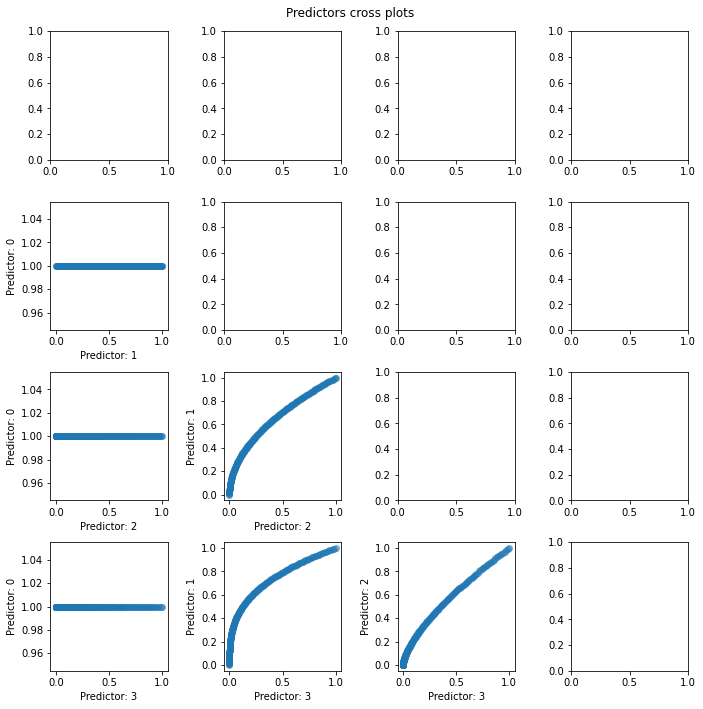

In [6]:
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(x_train.shape[1], x_train.shape[1])

for i in reversed(range(x_train.shape[1])):
    for j in range(i):
        pred_1 = x_train[:, i]
        pred_2 = x_train[:, j]

        ax = axes[i][j]
        ax.scatter(pred_1, pred_2, alpha=0.5)
        
        ax.set_xlabel(f"Predictor: {i}")
        ax.set_ylabel(f"Predictor: {j}")
fig.suptitle("Predictors cross plots")
fig.tight_layout()
fig.show()

<ipython-input-7-23478f1edfa3>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


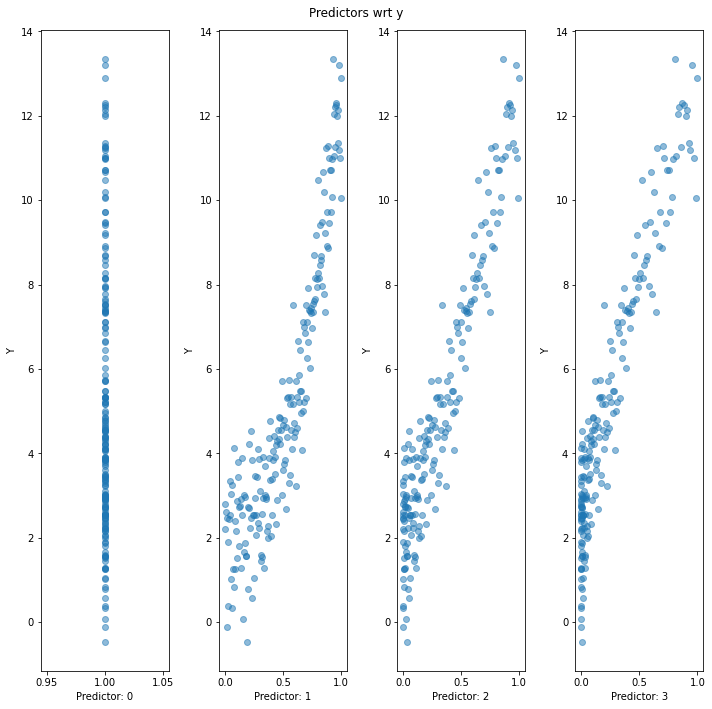

In [7]:
fig = plt.figure(figsize=(10, 10))
axes = fig.subplots(1, x_train.shape[1]).ravel()

for i in reversed(range(x_train.shape[1])):
    pred_1 = x_train[:, i]
    
    ax = axes[i]
    ax.scatter(pred_1, y_train, alpha=0.5)

    ax.set_xlabel(f"Predictor: {i}")
    ax.set_ylabel(f"Y")
fig.suptitle("Predictors wrt y")
fig.tight_layout()
fig.show()

<ipython-input-8-d3e905a8867a>:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


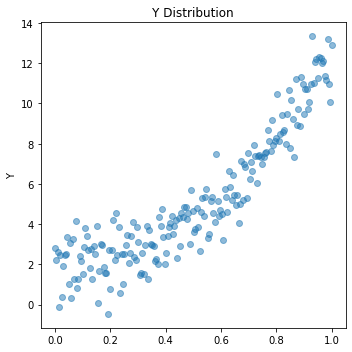

In [8]:
fig = plt.figure(figsize=(5,5))
ax = fig.subplots(1)

x = np.linspace(0, 1, y_train.shape[0])
ax.scatter(x, y_train, alpha=0.5)

ax.set_ylabel(f"Y")
ax.set_title(f"Y Distribution")

fig.tight_layout()
fig.show()

## Fit data

In [9]:
reg = linear_model.LinearRegression(fit_intercept = False)
reg.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

### 2.a

In [10]:
preds = reg.predict(x_train)

In [11]:
var = np.sqrt(np.square(y_train-preds)).var()
se = var/np.sqrt(y_train.shape[0])

In [12]:
conf_95 = np.zeros((y_train.shape[0], 2))
conf_95[:, 0] = preds-1.96*se
conf_95[:, 1] = preds+1.96*se

In [13]:
conf_95.mean(axis=0)

array([5.18944984, 5.28586763])

### 2.b

According to equation 3.15 $C_{\beta}$ = {$\beta$|$(\hat\beta-\beta)^{T}X^{T}X(\hat\beta-\beta) \leq \hat\sigma (\chi^{2}_{p+1})^{1-\alpha}|$}

In [15]:
conf_95 = (preds.mean()-se, preds.mean()+se)
conf_95

(5.213062360444306, 5.262255111920673)